In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Import the dataset
heart_df = pd.read_excel('heart.xlsx', sheet_name = 'heart')
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
# Create the dummy variables
df = pd.get_dummies(heart_df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'])
# Scale the dataset and updates the columns
scale_columns= ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
df[scale_columns] = StandardScaler().fit_transform(df[scale_columns])

In [6]:
# Create train and test sets
X = df.drop(['output'], axis = 1)
y = df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

# K Nearest Neighbors

In [17]:
# Create an empty array to store the scores
knn_scores = []
# Pick number of k from 1 to 20
for k in range(1,21):
    # Perfrom K neighbors classifier
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier Scores as K Increases')

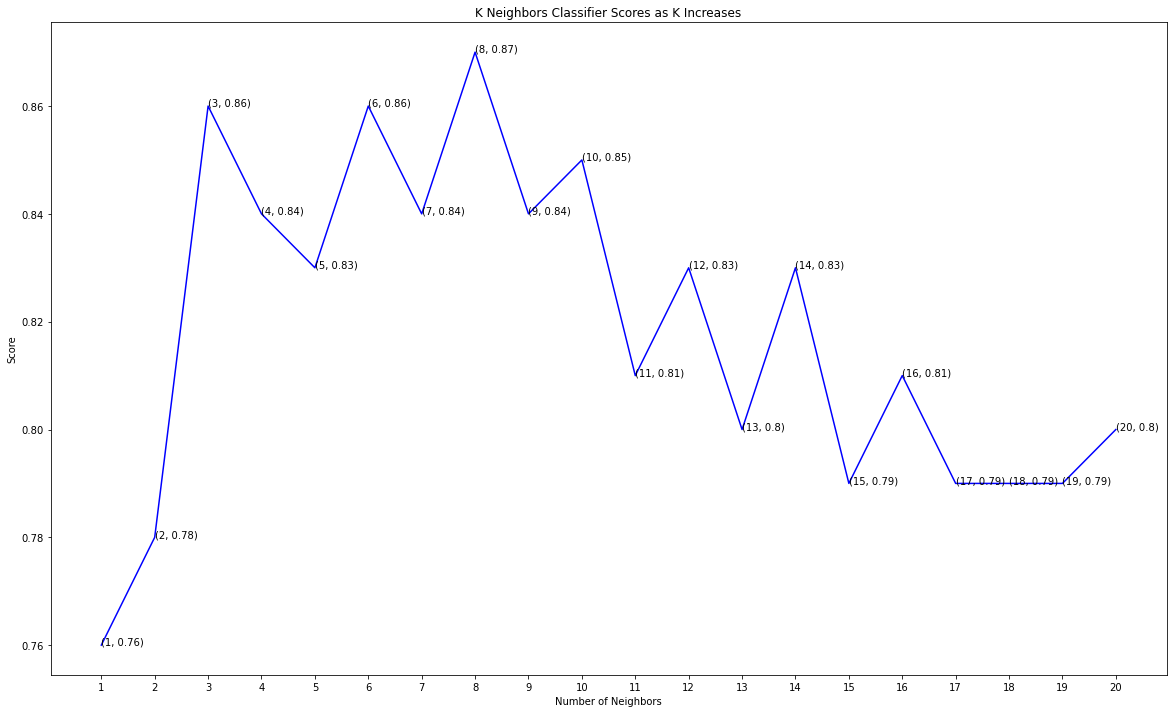

In [22]:
# Make a plot of the scores as k increases
plt.figure(figsize=(20,12))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'blue')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.title('K Neighbors Classifier Scores as K Increases')

# Decision Tree

In [11]:
# Create an empty array to store the decision tree scores
dt_scores = []
# Perfrom decision tree classification
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier Scores as Number of Maximum Features')

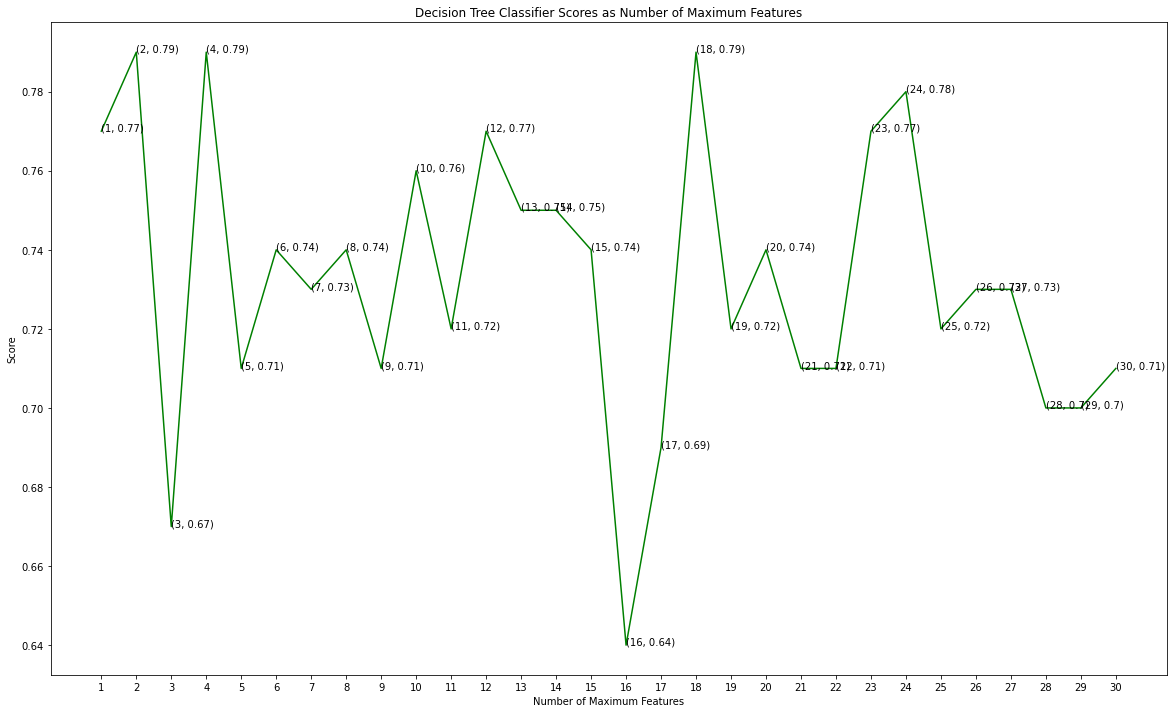

In [26]:
# Make a plot that shows the decision tree classifier scores as number of maximum features increases
plt.figure(figsize=(20,12))
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Number of Maximum Features')
plt.ylabel('Score')
plt.title('Decision Tree Classifier Scores as Number of Maximum Features')